In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
file = 'C:/Users/Gerardo/Desktop/diplomado/modulo-IV/proyecto-final/proyecto/mpg_2.csv'

In [3]:
df = pd.read_csv(file)


In [4]:
df = df.drop('class', 1)

In [5]:
df.head()

,displ,cyl,cty,hwy
0,1.8,4,18,29
1,1.8,4,21,29
2,2.0,4,20,31
3,2.0,4,21,30
4,2.8,6,16,26


In [7]:
X = df.drop("cyl",1)   #Características
y = df["cyl"]          #Target
df.head()

,displ,cyl,cty,hwy
0,1.8,4,18,29
1,1.8,4,21,29
2,2.0,4,20,31
3,2.0,4,21,30
4,2.8,6,16,26


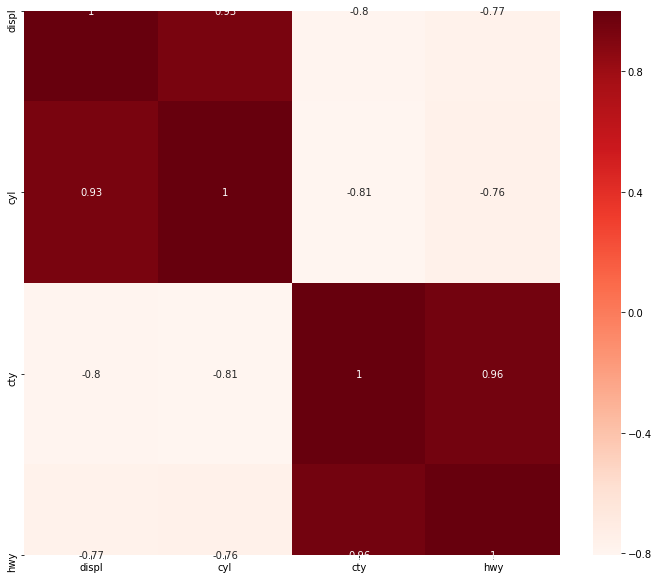

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:

cor_target = abs(cor["cyl"])


relevant_features = cor_target[cor_target>0.5]
relevant_features

displ    0.930227
cyl      1.000000
cty      0.805771
hwy      0.761912
Name: cyl, dtype: float64

In [10]:
print(df[["cty","displ"]].corr())
print(df[["hwy","cty"]].corr())

            cty     displ
cty    1.000000 -0.798524
displ -0.798524  1.000000
          hwy       cty
hwy  1.000000  0.955916
cty  0.955916  1.000000


In [11]:
X_1 = sm.add_constant(X)

#Ajuste del modelo sm.OLS
model = sm.OLS(y,X_1).fit()
model.pvalues.sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


hwy      1.235200e-01
cty      6.773041e-04
const    9.064491e-17
displ    2.383286e-54
dtype: float64

In [12]:
cols = list(X.columns)
pmax = 1

while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['displ', 'cty']


In [14]:
model = LinearRegression()

rfe = RFE(model, 7, verbose=1)


X_rfe = rfe.fit_transform(X,y)  


model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


In [15]:
nof_list = np.arange(1,13)            
high_score = 0

#Proceso para almacenar las características óptimas
nof = 0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Número óptimo de características: %d" %nof)
print("Desempeño con %d características: %f" % (nof, high_score))

Número óptimo de características: 1
Desempeño con 1 características: 0.883020


In [16]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['displ', 'cty', 'hwy'], dtype='object')


In [17]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Número óptimo de características:" + str(sum(coef != 0)))
print("Desempeño mediante la regularización Lasso: %f" %reg.score(X,y))

Número óptimo de características:2
Desempeño mediante la regularización Lasso: 0.874469


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Importancia de las características usando el modelo de Lasso')

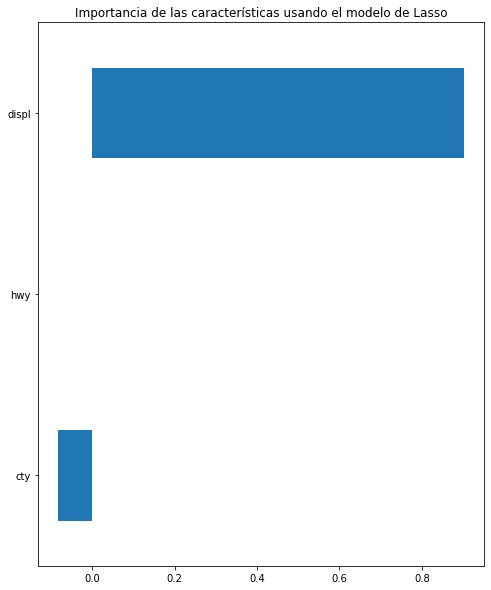

In [18]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las características usando el modelo de Lasso")